Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
55000 (55000, 784) (55000, 10)
5000 (5000, 784) (5000, 10)


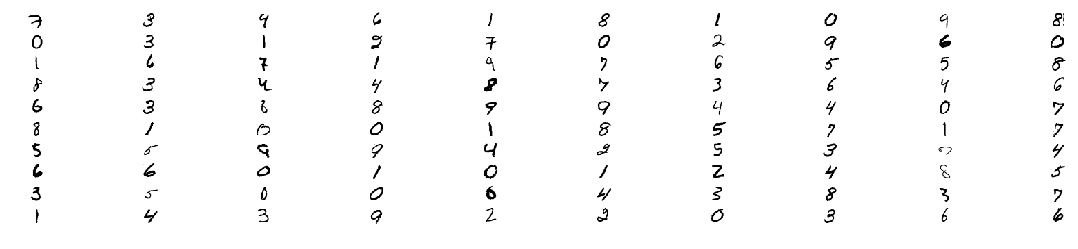

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

ntrain = mnist.train.num_examples
Xtrain = mnist.train.images
ytrain = mnist.train.labels
print(ntrain,Xtrain.shape,ytrain.shape)

ntest = mnist.test.num_examples
Xtest = mnist.test.images
ytest = mnist.test.labels

nvalidation = mnist.validation.num_examples
Xvalidation = mnist.validation.images
yvalidation = mnist.validation.labels
print(nvalidation,Xvalidation.shape,yvalidation.shape)

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plt.figure(figsize=(20,40))
for iteration in range(100):
    plt.subplot(100, 10, iteration + 1)
    plot_image(Xtrain[iteration,:])


In [5]:
n_inputs  = 28 * 28
n_hidden1 = 100
n_hidden2 = 20
n_outputs = 10

X = tf.placeholder(tf.float32,shape=(None, n_inputs),name="X")
y = tf.placeholder(tf.int64,shape=(None,n_outputs),name="y")

def neuron_layer(X,n_neurons,name,activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs,n_neurons),stddev=stddev)
        W = tf.Variable(init,name="kernel")
        b = tf.Variable(tf.zeros([1,n_neurons]),name="bias")
        Z = tf.matmul(X,W)+b
        if activation is not None:
            return activation(Z)
        else:
            return Z

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X,      n_hidden1,name="hidden1",activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1,n_hidden2,name="hidden2",activation=tf.nn.relu)
    logits  = neuron_layer(hidden2,n_outputs,name="outputs")
    

with tf.name_scope("loss"):
    yp    = tf.nn.softmax(logits)
    loss = -tf.reduce_mean(tf.cast(y,dtype=tf.float32) * tf.log(yp))

learning_rate = 0.05
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    accuracy = 100.0*tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits,axis=1),tf.argmax(y,axis=1)),tf.float32))
        

In [6]:
init = tf.global_variables_initializer()

n_epochs = 100
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        # compute model
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_train       = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_validation  = accuracy.eval(feed_dict={X:Xvalidation, y:yvalidation})
        print(epoch,"Training batch accuracy:",acc_train,"Validation set accuracy:",acc_validation)
    

0 Training batch accuracy: 65.0 Validation set accuracy: 61.08
1 Training batch accuracy: 78.0 Validation set accuracy: 76.4
2 Training batch accuracy: 81.5 Validation set accuracy: 82.46
3 Training batch accuracy: 84.0 Validation set accuracy: 85.66
4 Training batch accuracy: 85.5 Validation set accuracy: 87.5
5 Training batch accuracy: 87.5 Validation set accuracy: 88.12
6 Training batch accuracy: 85.5 Validation set accuracy: 89.14
7 Training batch accuracy: 90.5 Validation set accuracy: 89.4
8 Training batch accuracy: 89.5 Validation set accuracy: 90.1
9 Training batch accuracy: 88.0 Validation set accuracy: 90.34
10 Training batch accuracy: 93.0 Validation set accuracy: 90.72
11 Training batch accuracy: 88.0 Validation set accuracy: 90.9
12 Training batch accuracy: 90.0 Validation set accuracy: 91.36
13 Training batch accuracy: 93.0 Validation set accuracy: 91.52
14 Training batch accuracy: 88.5 Validation set accuracy: 91.84
15 Training batch accuracy: 90.5 Validation set accurac